In [1]:
corr='https://github.com/EvansDataScience/basicFinal_CompThink/raw/master/data/corruption.csv'
econ='https://github.com/EvansDataScience/basicFinal_CompThink/raw/master/data/economic.csv'
press='https://github.com/EvansDataScience/basicFinal_CompThink/raw/master/data/pressfreedom.csv'

* The _corr_ has data about the _Corruption Perception Index_ (CPI) produced by [Transparency International](https://www.transparency.org/).

* The _econ_ has data about the _Economic Freedom Index_ (EFI) produced by [Fraser Institute](https://www.fraserinstitute.org).

* The _press_ has data about the _World Press Freedom Index_ (WPFI) produced by [Reporters Without Borders](https://rsf.org/en/world-press-freedom-index).


In this case, I want to join them (not concatenate):

In [2]:
import pandas as pd
corrupt=pd.read_csv(corruptLink,encoding='Latin-1')
econo=pd.read_csv(econoLink,encoding='Latin-1')
enviro=pd.read_csv(enviroLink,encoding='Latin-1')
press=pd.read_csv(pressLink,encoding='Latin-1')

As each data set has a differing amount of rows (countries), and possibly a different way to name each one, the result will be far from perfect:

In [4]:
join1=pd.merge(corrupt,econo)
join2=pd.merge(press,enviro)
allIndexes=pd.merge(join1,join2)

As always it is good to verify the data types:

In [5]:
allIndexes.dtypes

Country             object
corruptionIndex      int64
ISO                 object
scoreEconomy       float64
scorepress         float64
presscat            object
environment        float64
environmentCat       int64
dtype: object

And check descriptives:

In [6]:
allIndexes.describe(include='all') 

,Country,corruptionIndex,ISO,scoreEconomy,scorepress,presscat,environment,environmentCat
count,129,129.000000,129,129.000000,129.000000,129,129.000000,129.000000
unique,129,NaN,129,NaN,NaN,3,NaN,NaN
top,Sri Lanka,NaN,SGP,NaN,NaN,Medium,NaN,NaN
freq,1,NaN,1,NaN,NaN,71,NaN,NaN
mean,NaN,45.418605,NaN,6.829457,31.097597,NaN,69.393023,0.542636
std,NaN,19.296898,NaN,0.907765,13.125220,NaN,14.732355,0.500121
min,NaN,14.000000,NaN,2.920000,8.590000,NaN,37.100000,0.000000
25%,NaN,31.000000,NaN,6.320000,22.660000,NaN,59.250000,0.000000
50%,NaN,40.000000,NaN,6.920000,29.920000,NaN,70.840000,1.000000
75%,NaN,58.000000,NaN,7.510000,40.430000,NaN,81.260000,1.000000


In [7]:
allIndexes.head()

,Country,corruptionIndex,ISO,scoreEconomy,scorepress,presscat,environment,environmentCat
0,New Zealand,90,NZL,8.48,10.01,High,88.00,1
1,Denmark,90,DNK,7.77,8.89,High,89.21,1
2,Finland,89,FIN,7.75,8.59,High,90.68,1
3,Sweden,88,SWE,7.65,12.33,High,90.43,1
4,Switzerland,86,CHE,8.44,11.76,High,86.93,1


There is some formatting needed:

Let's order it:

In [8]:
oldCols=allIndexes.columns.tolist()
oldCols

['Country',
 'corruptionIndex',
 'ISO',
 'scoreEconomy',
 'scorepress',
 'presscat',
 'environment',
 'environmentCat']

When we do not have slices, there is extra work:

In [9]:
numericIndex=[oldCols[i] for i in [1,3,4,6]]
numericIndex

['corruptionIndex', 'scoreEconomy', 'scorepress', 'environment']

In [10]:
newValues=[oldCols[0],oldCols[2],*numericIndex,oldCols[5],oldCols[7]]
newValues

['Country',
 'ISO',
 'corruptionIndex',
 'scoreEconomy',
 'scorepress',
 'environment',
 'presscat',
 'environmentCat']

Then, the new order will be:

In [11]:
allIndexes=allIndexes[newValues]
allIndexes.head()

,Country,ISO,corruptionIndex,scoreEconomy,scorepress,environment,presscat,environmentCat
0,New Zealand,NZL,90,8.48,10.01,88.00,High,1
1,Denmark,DNK,90,7.77,8.89,89.21,High,1
2,Finland,FIN,89,7.75,8.59,90.68,High,1
3,Sweden,SWE,88,7.65,12.33,90.43,High,1
4,Switzerland,CHE,86,8.44,11.76,86.93,High,1


There are several numeric values. Let's see a summary:

In [12]:
allIndexes.describe()

,corruptionIndex,scoreEconomy,scorepress,environment,environmentCat
count,129.000000,129.000000,129.000000,129.000000,129.000000
mean,45.418605,6.829457,31.097597,69.393023,0.542636
std,19.296898,0.907765,13.125220,14.732355,0.500121
min,14.000000,2.920000,8.590000,37.100000,0.000000
25%,31.000000,6.320000,22.660000,59.250000,0.000000
50%,40.000000,6.920000,29.920000,70.840000,1.000000
75%,58.000000,7.510000,40.430000,81.260000,1.000000
max,90.000000,8.810000,80.960000,90.680000,1.000000


It is important to find some monotony issues in these values:

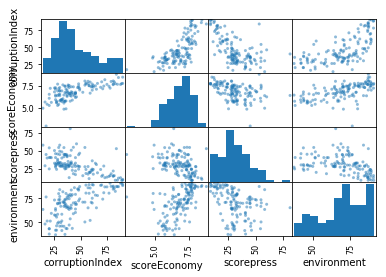

In [13]:
% matplotlib inline
import matplotlib.pyplot as plt

pd.plotting.scatter_matrix(allIndexes.iloc[:,2:6])
plt.show()

Score press is negatively correlated to the rest. That means that the score for that column needs to be reversed:

In [15]:
# creating reversing function:
def reverse(aColumn):
    return max(aColumn) - aColumn + min(aColumn)

In [16]:
# reversing using function:
allIndexes.scorepress=reverse(allIndexes.scorepress)

We should see a different result:

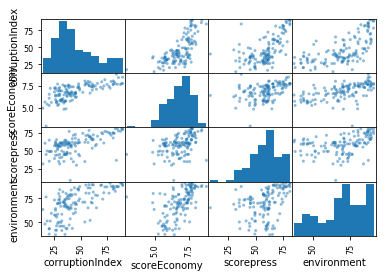

In [17]:
pd.plotting.scatter_matrix(allIndexes.iloc[:,2:6])
plt.show()

The variable _presscat_ needs to be an ordinal factor.

In [19]:
allIndexes['presscat'].value_counts()

Medium    71
High      35
Low       23
Name: presscat, dtype: int64

In [20]:
allIndexes['presscat'].replace({'Medium':2, "High":3, "Low":1},inplace=True)

In [21]:
allIndexes['presscat'].value_counts(sort=False)

1    23
2    71
3    35
Name: presscat, dtype: int64

The numbers will help R users when they set it as an ordinal. You can convert them to ordinal, but that information will be lost in R.

In [22]:
allIndexes.head()

,Country,ISO,corruptionIndex,scoreEconomy,scorepress,environment,presscat,environmentCat
0,New Zealand,NZL,90,8.48,79.54,88.00,3,1
1,Denmark,DNK,90,7.77,80.66,89.21,3,1
2,Finland,FIN,89,7.75,80.96,90.68,3,1
3,Sweden,SWE,88,7.65,77.22,90.43,3,1
4,Switzerland,CHE,86,8.44,77.79,86.93,3,1


We are proposing that the categories coded as numbers follow an asceding format, then let's check if _environmentCat_ should be changed:

In [23]:
allIndexes['environmentCat'].value_counts()

1    70
0    59
Name: environmentCat, dtype: int64

As there is no need for that, just save the file:

In [24]:
#allIndexes.to_csv("allIndexes.csv",index=None)